In [62]:
import pandas as pd
from utils.db_conn import query
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import requests

r = 'https://api-pub.bitfinex.com/v2/book/tBTCUSD/P2'

response = requests.get(r, params={'len': 100})
df = pd.DataFrame(response.json(), columns=['price', 'count', 'amount'])
df

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api-pub.bitfinex.com:443
DEBUG:urllib3.connectionpool:https://api-pub.bitfinex.com:443 "GET /v2/book/tBTCUSD/P2?len=100 HTTP/1.1" 200 None


,price,count,amount
0,30500,34,15.525401
1,30400,122,105.611265
2,30300,48,239.969455
3,30200,60,69.039615
4,30100,50,18.053982
...,...,...,...
195,40100,14,-0.353165
196,40200,18,-0.343465
197,40300,17,-0.387979
198,40400,26,-0.396337


In [64]:
bid = df[df['amount'] > 0]
ask = df[df['amount'] < 0]

<AxesSubplot:xlabel='amount', ylabel='price'>

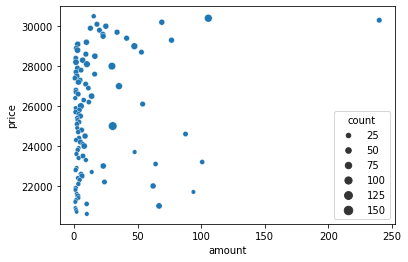

In [65]:
sns.scatterplot(y=bid['price'], x=bid['amount'], size=bid['count'])

<AxesSubplot:xlabel='amount', ylabel='price'>

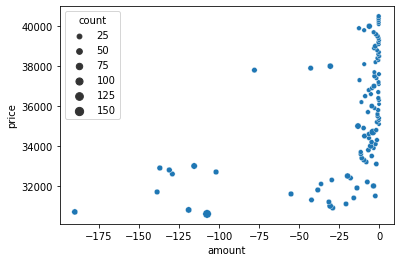

In [66]:
sns.scatterplot(y=ask['price'], x=ask['amount'], size=ask['count'])

## Heatmap

In [131]:
columns = ['id', 'time', 'price', 'count', 'amount', 'type']

data = pd.DataFrame(query('query_orderbook', ['2022-05-25', '2022-06-03', 'P2']), columns=columns).drop('id', axis=1)
data.time = data.time.dt.strftime('%Y-%m-%d %H')
data.amount = data.amount.abs() * data['count']
data = data[['time', 'price', 'amount']].drop_duplicates()
data

,time,price,amount
0,2022-05-25 13,29700.0,2329.067400
1,2022-05-25 13,29600.0,14689.895000
2,2022-05-25 13,29500.0,4261.130000
3,2022-05-25 13,29400.0,1775.977200
4,2022-05-25 13,29300.0,787.378800
...,...,...,...
41795,2022-06-02 23,40000.0,367.262020
41796,2022-06-02 23,40100.0,5.395830
41797,2022-06-02 23,40200.0,6.182370
41798,2022-06-02 23,40300.0,6.595643


In [132]:
heatmap = data.pivot_table(data, index='price', columns=['time'])
heatmap

amount                                                          \
time    2022-05-25 13 2022-05-25 14 2022-05-25 15 2022-05-25 16 2022-05-25 17   
price                                                                           
18300.0           NaN           NaN           NaN           NaN           NaN   
18400.0           NaN           NaN           NaN           NaN           NaN   
18500.0           NaN           NaN           NaN           NaN           NaN   
18600.0           NaN           NaN           NaN           NaN           NaN   
18700.0           NaN           NaN           NaN           NaN           NaN   
...               ...           ...           ...           ...           ...   
41700.0           NaN           NaN           NaN           NaN           NaN   
41800.0           NaN           NaN           NaN           NaN           NaN   
41900.0           NaN           NaN           NaN           NaN           NaN   
42000.0           NaN           NaN           NaN           NaN           NaN   
42100.0           NaN           NaN           NaN           NaN           NaN   

                                                                               \
time    2022-05-25 18 2022-05-25 19 2022-05-25 20 2022-05-25 21 2022-05-25 22   
price                                                                           
18300.0           NaN           NaN           NaN           NaN           NaN   
18400.0           NaN           NaN           NaN           NaN           NaN   
18500.0           NaN           NaN           NaN           NaN           NaN   
18600.0           NaN           NaN           NaN           NaN           NaN   
18700.0           NaN           NaN           NaN           NaN           NaN   
...               ...           ...           ...           ...           ...   
41700.0           NaN           NaN           NaN           NaN           NaN   
41800.0           NaN           NaN           NaN           NaN           NaN   
41900.0           NaN           NaN           NaN           NaN           NaN   
42000.0           NaN           NaN           NaN           NaN           NaN   
42100.0           NaN           NaN           NaN           NaN           NaN   

         ...                                                          \
time     ... 2022-06-02 14 2022-06-02 15 2022-06-02 16 2022-06-02 17   
price    ...                                                           
18300.0  ...           NaN           NaN           NaN           NaN   
18400.0  ...           NaN           NaN           NaN           NaN   
18500.0  ...           NaN           NaN           NaN           NaN   
18600.0  ...           NaN           NaN           NaN           NaN   
18700.0  ...           NaN           NaN           NaN           NaN   
...      ...           ...           ...           ...           ...   
41700.0  ...           NaN           NaN           NaN           NaN   
41800.0  ...           NaN           NaN           NaN           NaN   
41900.0  ...           NaN           NaN           NaN           NaN   
42000.0  ...           NaN           NaN           NaN           NaN   
42100.0  ...           NaN           NaN           NaN           NaN   

                                                                               \
time    2022-06-02 18 2022-06-02 19 2022-06-02 20 2022-06-02 21 2022-06-02 22   
price                                                                           
18300.0           NaN           NaN           NaN           NaN           NaN   
18400.0           NaN           NaN           NaN           NaN           NaN   
18500.0           NaN           NaN           NaN           NaN           NaN   
18600.0           NaN           NaN           NaN           NaN           NaN   
18700.0           NaN           NaN           NaN           NaN           NaN   
...               ...           ...           ...           ...           ...   
41700.0

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000014BDFD5F190>


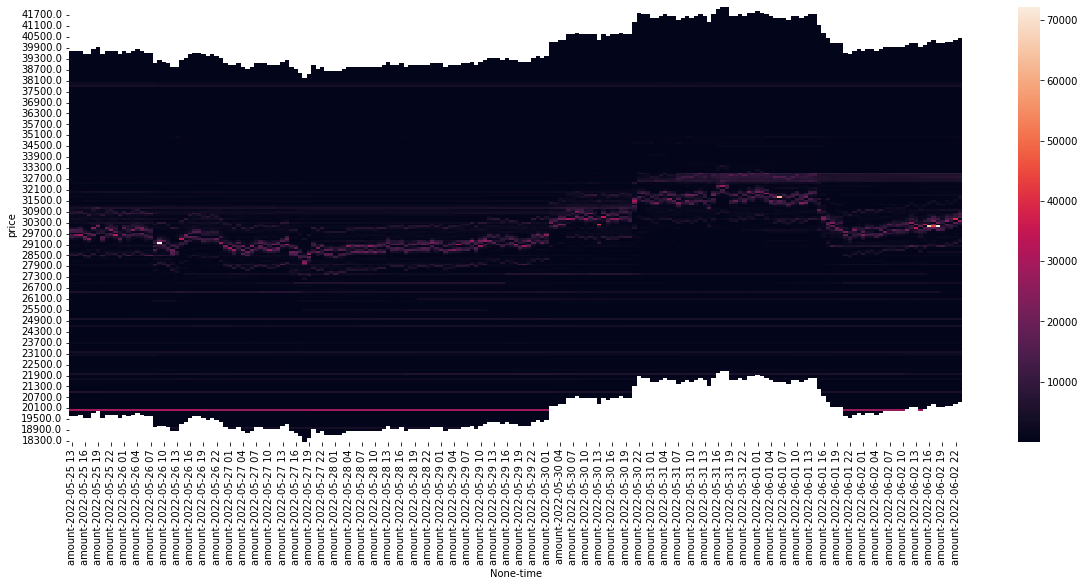

In [133]:
plt.figure(figsize=(20,8))
sns.heatmap(heatmap).invert_yaxis() # xticklabels=False, yticklabels=False
plt.savefig('output.png')